# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

### FCTS

In [2]:
directory = './images/fcts'

if not os.path.exists(directory):
    os.makedirs(directory)
    
#speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#arrays to store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [3]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


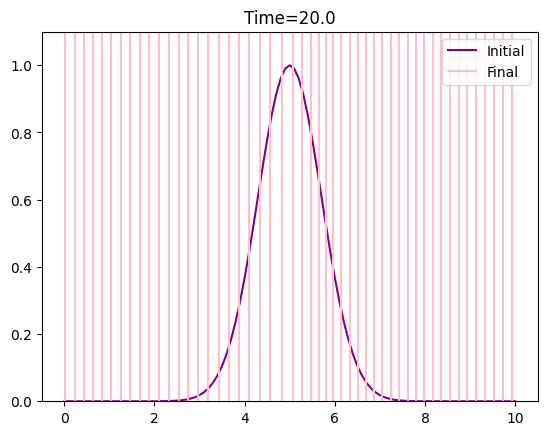

In [4]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial', color='purple')
plt.plot(x, u_current, label='Final', color='pink')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

very unstable scheme, the oscillations grow exponentially  

unconditionally unstable: whatever choice you make it will explode

In [5]:
# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)


['fig_00040.png', 'fig_00370.png', 'fig_00120.png', 'fig_00320.png', 'fig_00210.png', 'fig_00270.png', 'fig_00260.png', 'fig_00180.png', 'fig_00060.png', 'fig_00100.png', 'fig_00020.png', 'fig_00280.png', 'fig_00290.png', 'fig_00090.png', 'fig_00240.png', 'fig_00400.png', 'fig_00340.png', 'fig_00250.png', 'fig_00140.png', 'fig_00390.png', 'fig_00200.png', 'fig_00380.png', 'fig_00190.png', 'fig_00300.png', 'fig_00010.png', 'fig_00130.png', 'fig_00070.png', 'fig_00220.png', 'fig_00080.png', 'fig_00350.png', 'fig_00230.png', 'fig_00150.png', 'fig_00310.png', 'fig_00330.png', 'fig_00050.png', 'fig_00160.png', 'fig_00000.png', 'fig_00360.png', 'fig_00110.png', 'fig_00170.png', 'fig_00030.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170

In [6]:
import imageio
with imageio.get_writer(f'./images/movie_fcts.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(f'{directory}/'+file)
        writer.append_data(image)
        
files=[]


/tmp/ipykernel_1627/1152963439.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{directory}/'+file)


In [7]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images/movie_fcts.mp4" type="video/mp4">
</video></div>""")

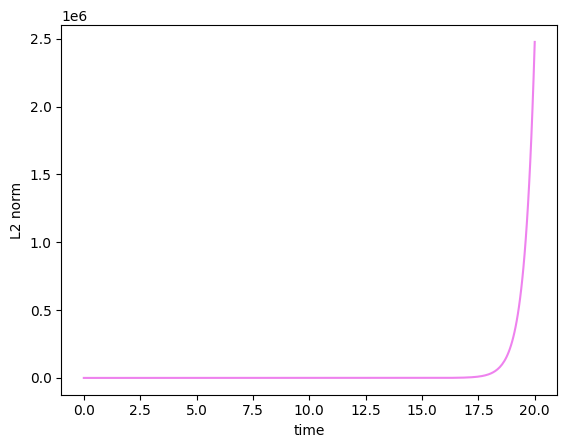

In [8]:
plt.plot(time,l2norm, color='violet')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.show()

You expect to have a constant (with just one plot you can have an idea if your code is working)

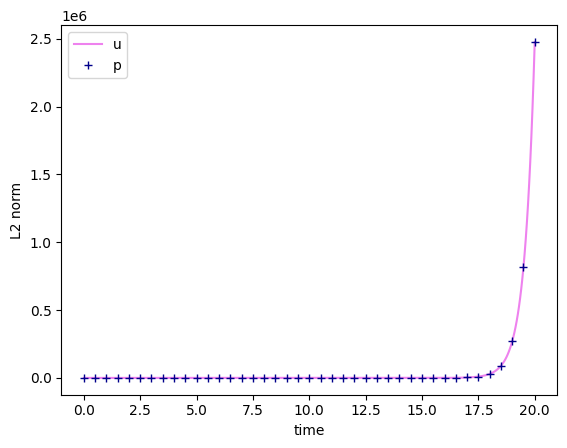

In [9]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm, color='violet', label='my derivation')
plt.plot(l2_saved[:,0], l2_saved[:,1], '+', color='darkblue', label='stored data')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.legend('upper left')
plt.show()

#### Change par

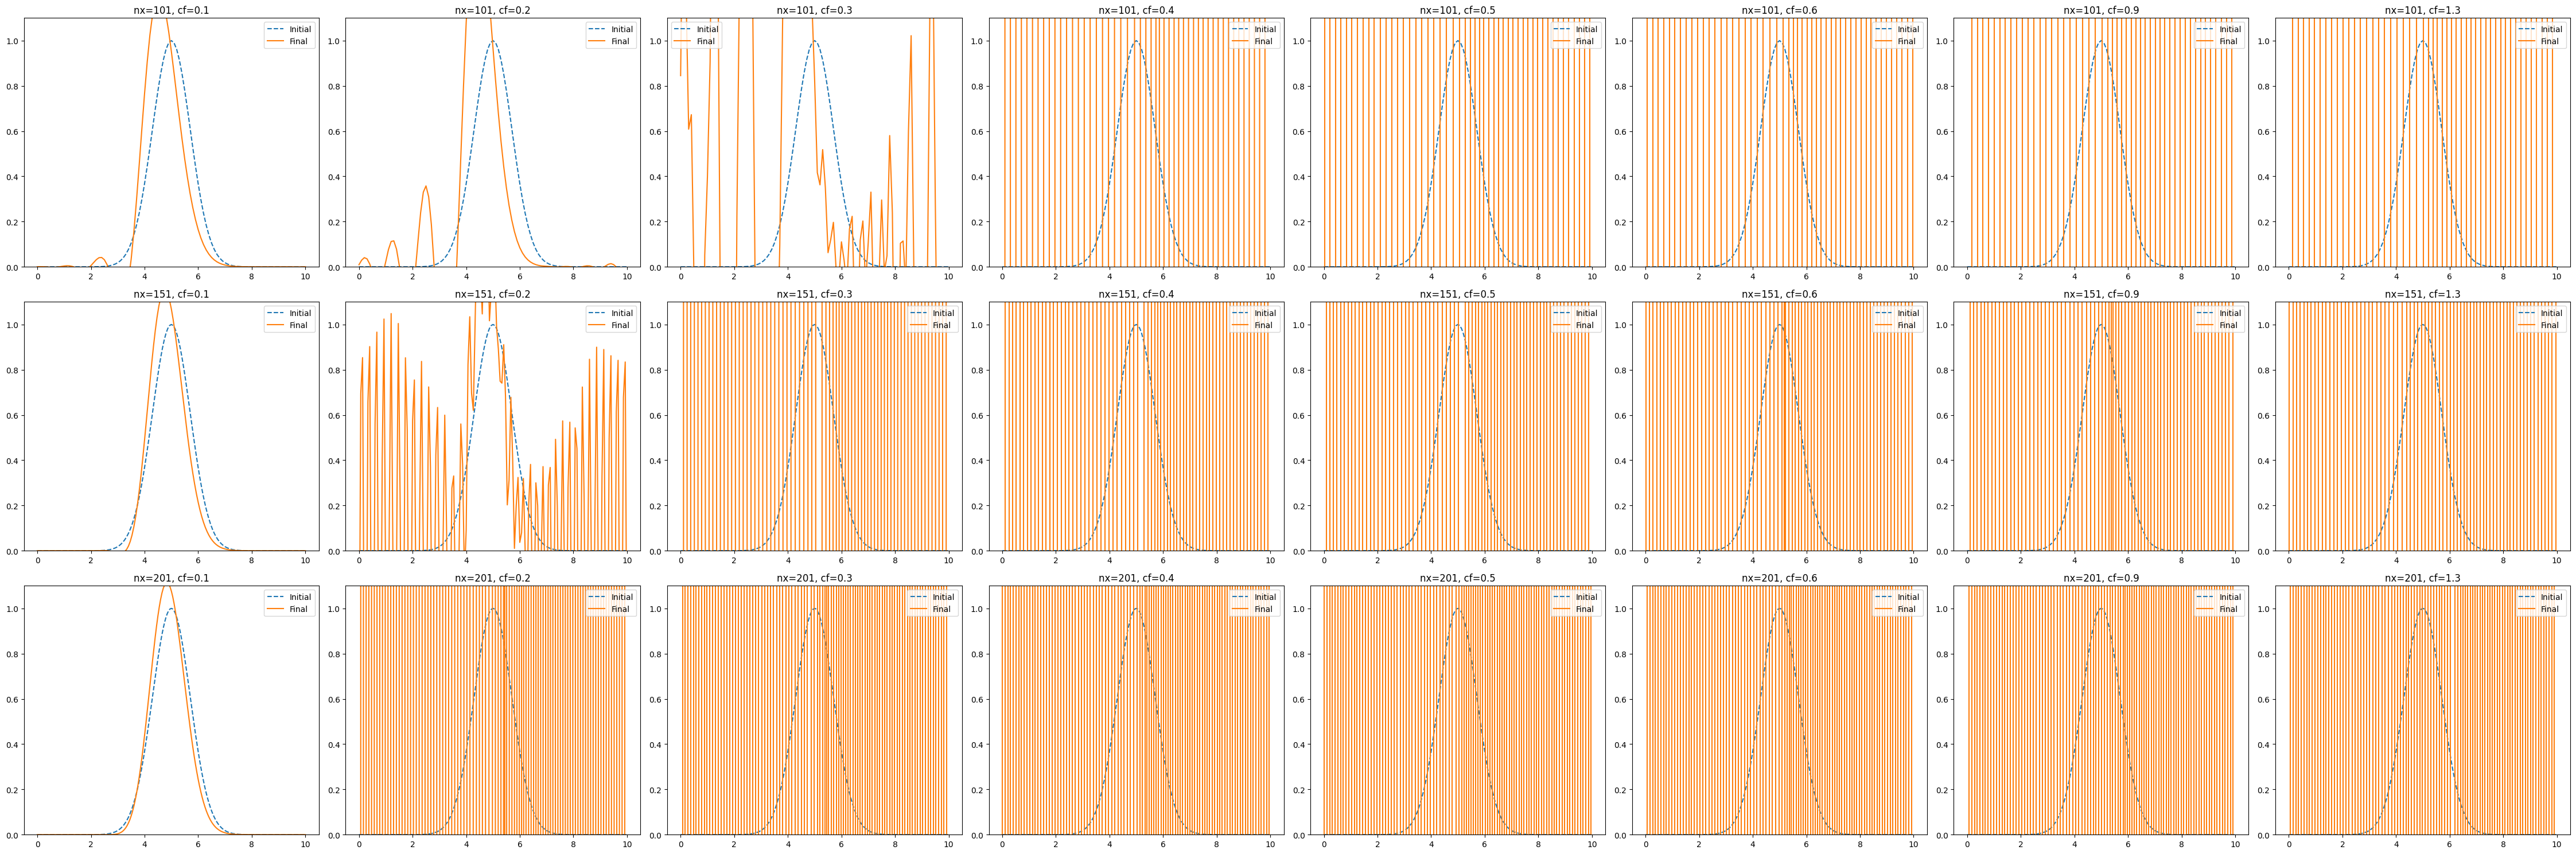

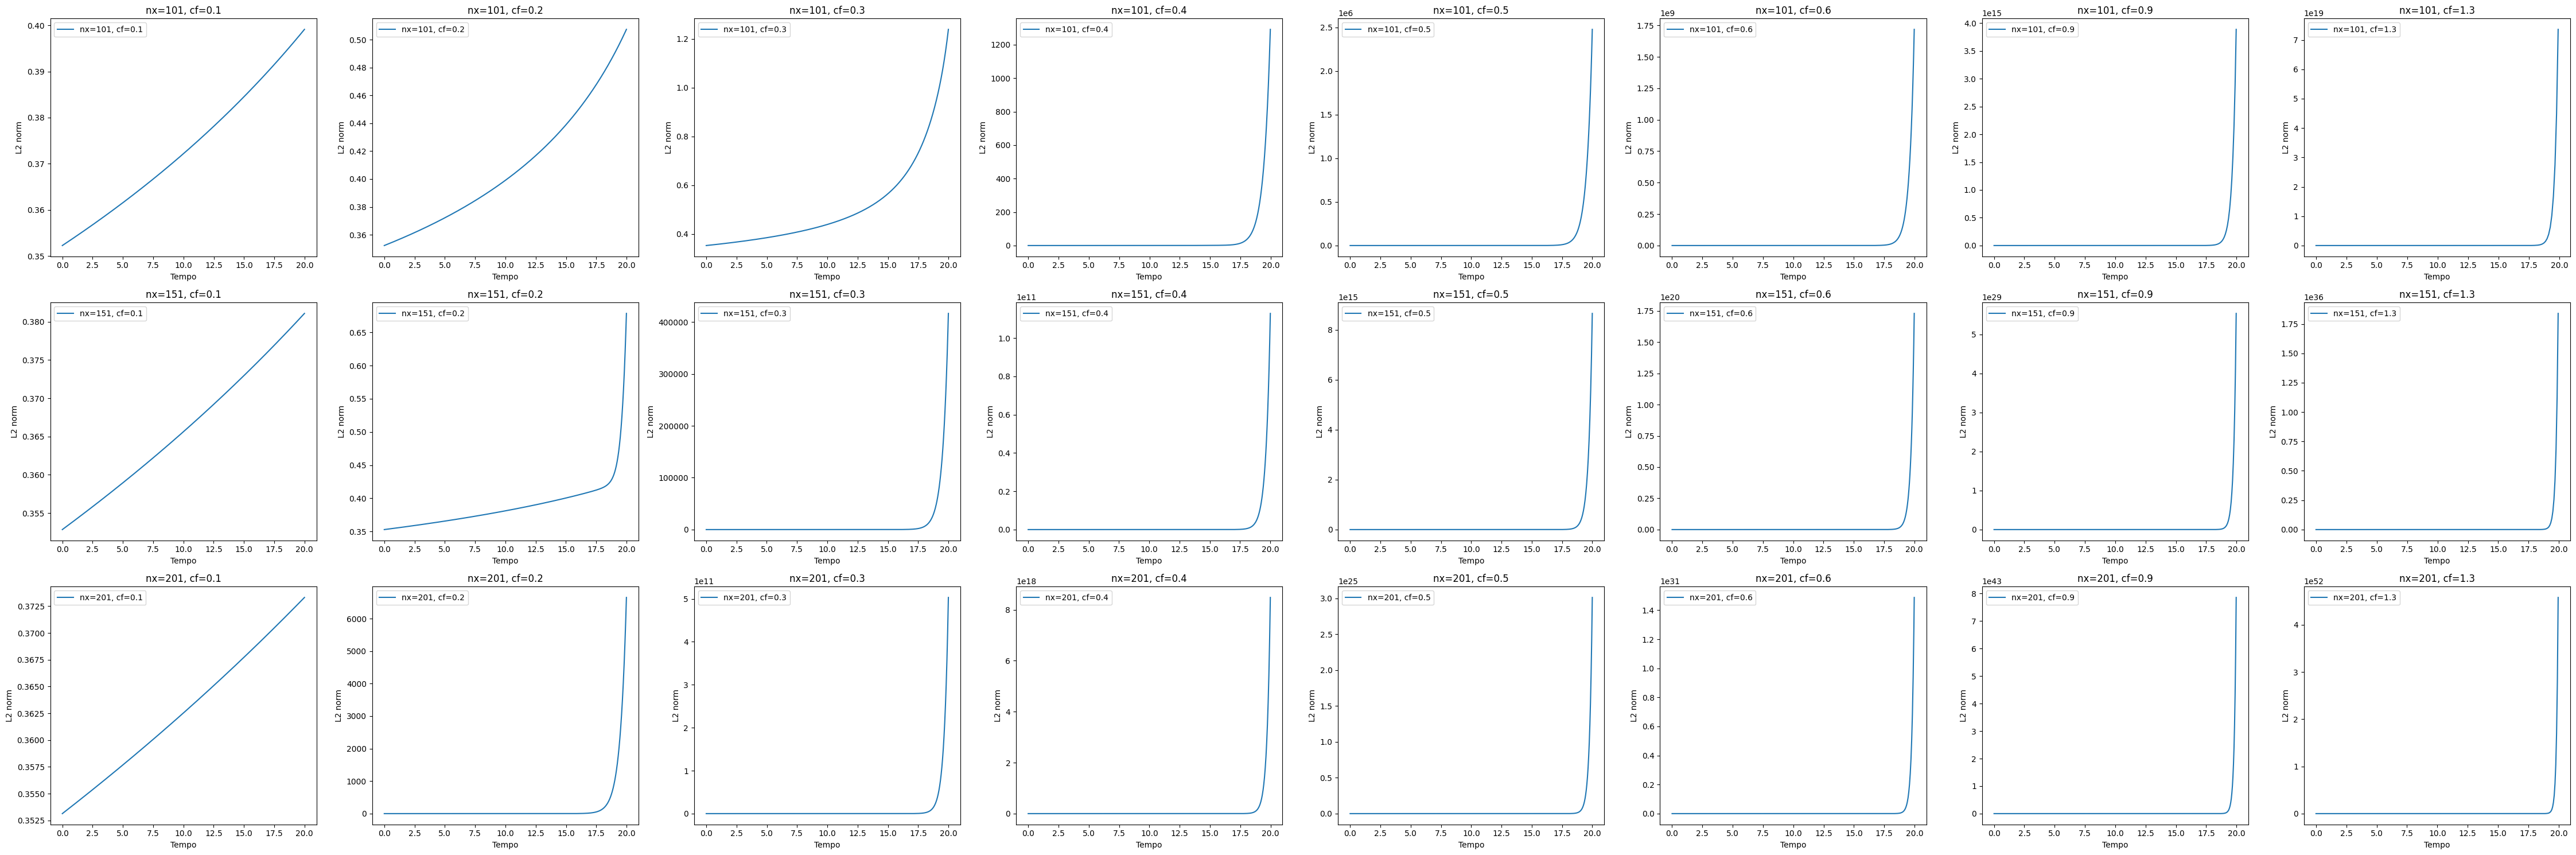

In [10]:
def solve_advection_ftcs(nx, cf, t_final=20.0, a=1.0):
    L = 10.0  
    dx = L / (nx - 1)
    x = np.linspace(0, L, nx)
   
    dt = cf * dx / a
    num_iter = int(t_final / dt)
    
    x0 = 5
    u_initial = np.exp(-(x - x0) ** 2)
 
    u_current = u_initial.copy()

    l2norm = [np.sqrt(np.sum(u_current ** 2) / len(u_current))]
    time = [0.0]

    t = 0.0 
 
    for i in range(num_iter):
        u_next = u_current - (a * dt / (2 * dx)) * (np.roll(u_current, -1) - np.roll(u_current, 1))
        u_current = u_next.copy()

        t += dt
        l2norm.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))
        time.append(t)
    
    return x, u_initial, u_current, time, l2norm

# --- Execute for different nx and cf ---
nx_values = [101, 151, 201]   
cf_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1.3] 

plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        x, u_initial, u_final, time, l2norm = solve_advection_ftcs(nx, cf)
        
        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(x, u_initial, '--', label="Initial")
        plt.plot(x, u_final, label=f"Final")
        plt.ylim(0, 1.1)
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()

# --- Plot of L2 norm for different nx cf ---
plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        _, _, _, time, l2norm = solve_advection_ftcs(nx, cf)

        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(time, l2norm, label=f"nx={nx}, cf={cf}")
        plt.xlabel("Time")
        plt.ylabel("L2 norm")
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()


### Lax-friedrichs

In [11]:
directory = './images/laxfriedrichs'

if not os.path.exists(directory):
    os.makedirs(directory)
    
#speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [12]:
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the Lax-Friedrichs method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = 0.5* ( np.roll(u_current, 1) + np.roll(u_current, -1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    #advance the time 
    t += dt
    i += 1
    
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
  
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


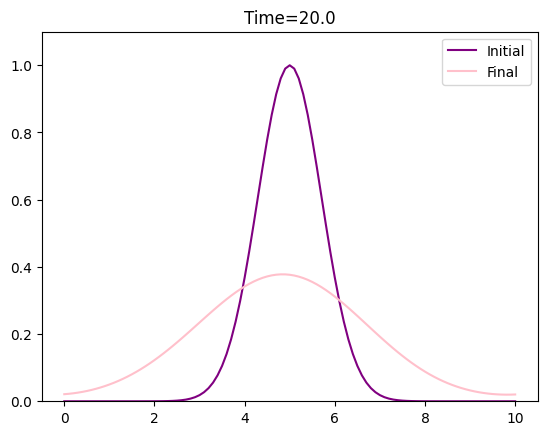

In [13]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial', color='purple')
plt.plot(x, u_current, label='Final', color='pink')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [14]:
# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(len(files))

['fig_00040.png', 'fig_00370.png', 'fig_00120.png', 'fig_00320.png', 'fig_00210.png', 'fig_00270.png', 'fig_00260.png', 'fig_00180.png', 'fig_00060.png', 'fig_00100.png', 'fig_00020.png', 'fig_00280.png', 'fig_00290.png', 'fig_00090.png', 'fig_00240.png', 'fig_00400.png', 'fig_00340.png', 'fig_00250.png', 'fig_00140.png', 'fig_00390.png', 'fig_00200.png', 'fig_00380.png', 'fig_00190.png', 'fig_00300.png', 'fig_00010.png', 'fig_00130.png', 'fig_00070.png', 'fig_00220.png', 'fig_00080.png', 'fig_00350.png', 'fig_00230.png', 'fig_00150.png', 'fig_00310.png', 'fig_00330.png', 'fig_00050.png', 'fig_00160.png', 'fig_00000.png', 'fig_00360.png', 'fig_00110.png', 'fig_00170.png', 'fig_00030.png'] 

41


In [126]:
import imageio
with imageio.get_writer(f'./images/movie_laxfried.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(f'{directory}/'+file)
        writer.append_data(image)
        
files=[]

/tmp/ipykernel_122371/2978513466.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{directory}/'+file)


In [82]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images/laxfriedrichs/movie.mp4" type="video/mp4">
</video></div>""")

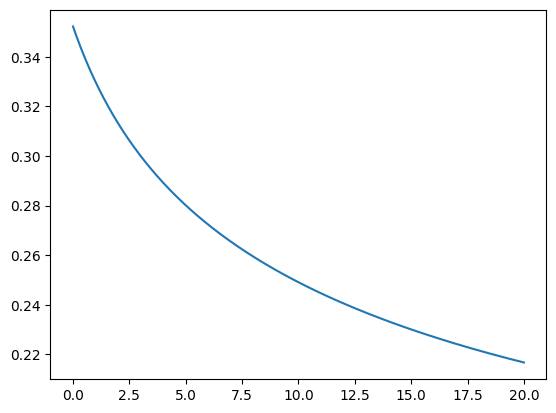

In [127]:
plt.plot(time,l2norm)
plt.show()

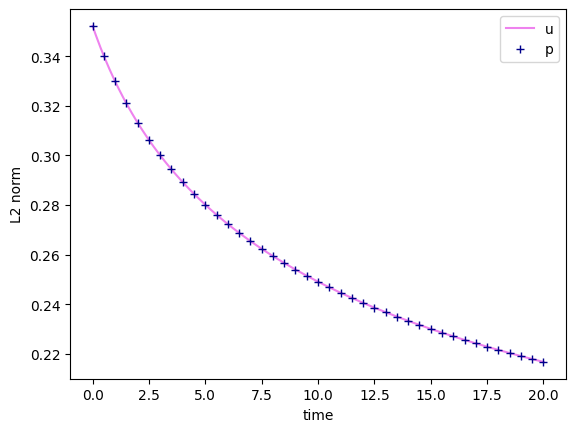

In [15]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm, color='violet', label='my derivation')
plt.plot(l2_saved[:,0], l2_saved[:,1], '+', color='darkblue', label='stored data')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.legend('upper left')
plt.show()

#### Change par

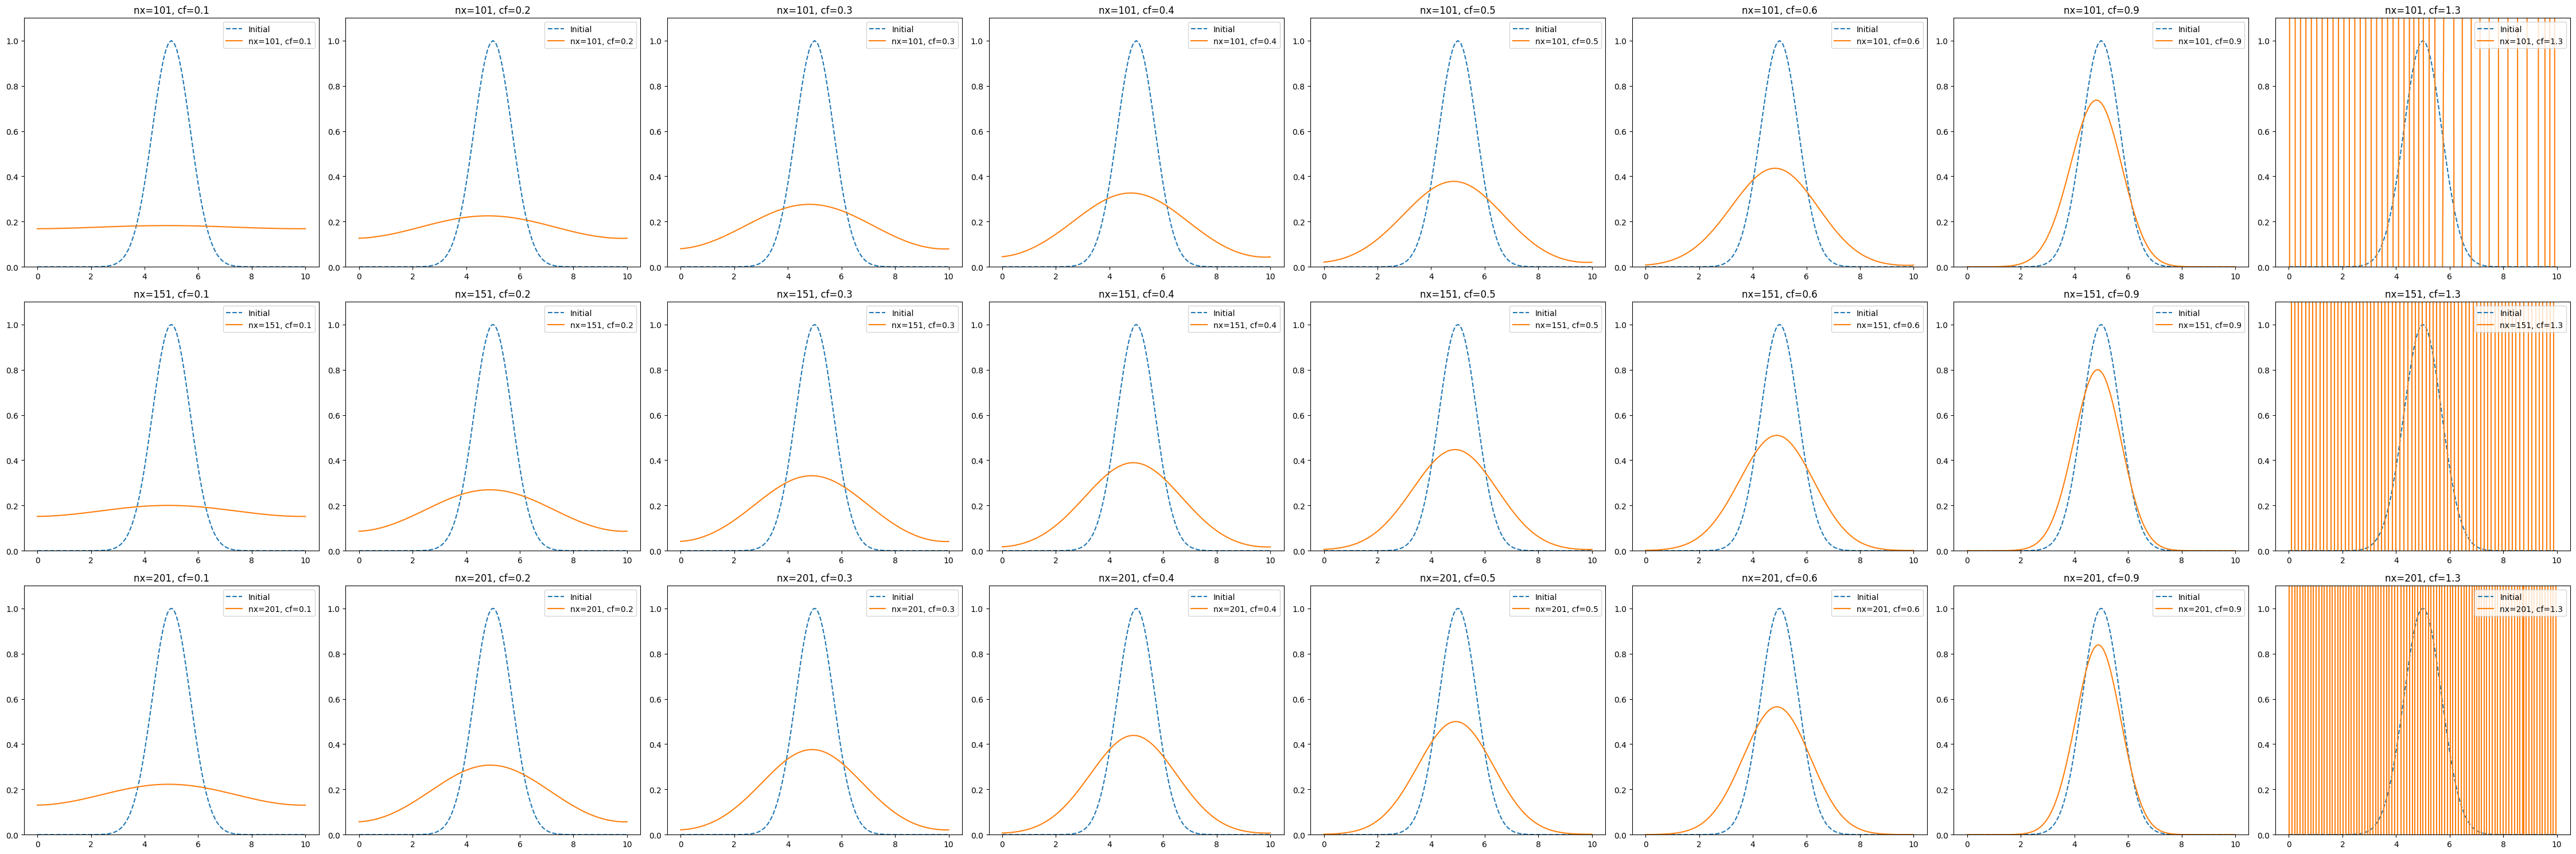

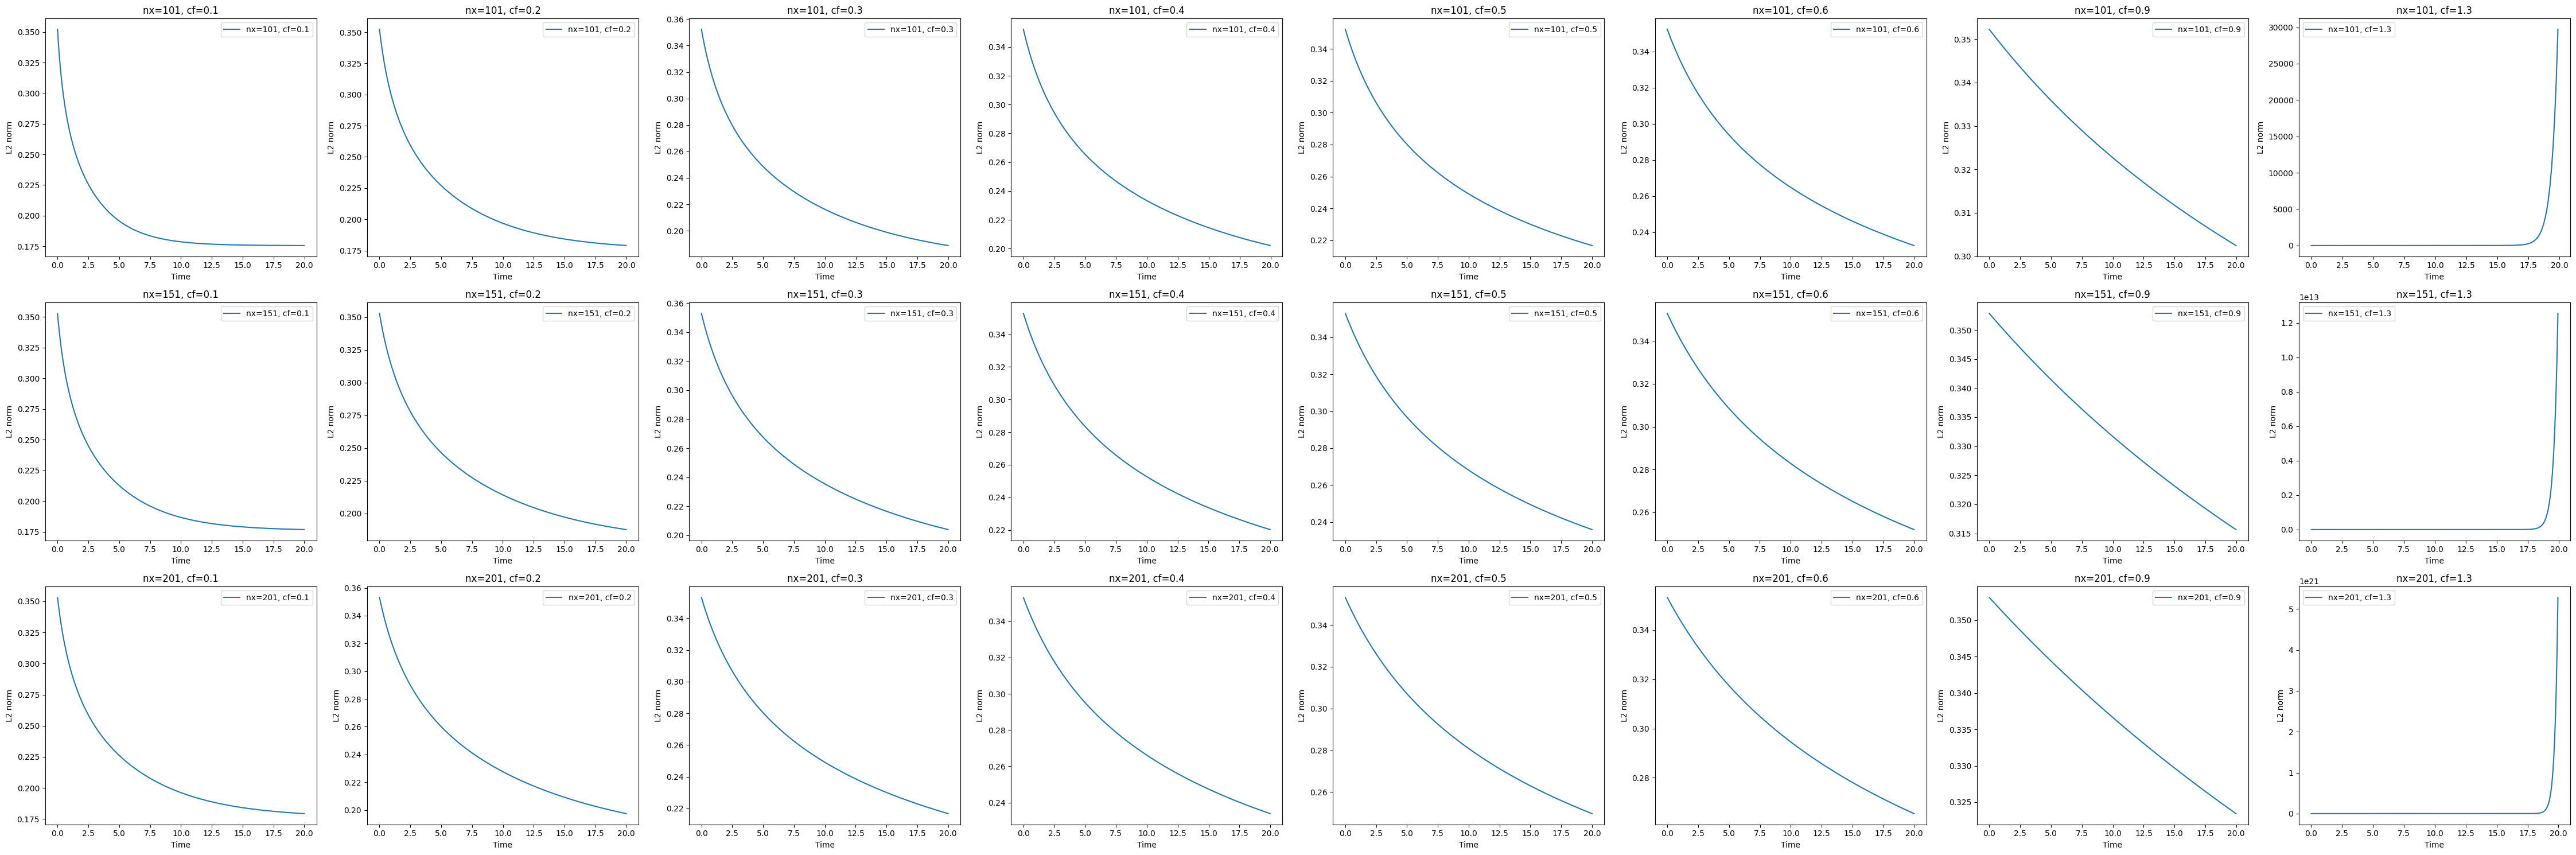

In [17]:

def solve_advection_laxfried(nx, cf, t_final=20.0, a=1.0):
    L = 10.0
    dx = L / (nx - 1)
    x = np.linspace(0, L, nx)
    dt = cf * dx / a
    num_iter = int(t_final / dt)
    x0 = 5
    u_initial = np.exp(-(x - x0) ** 2)
    u_current = u_initial.copy()
    l2norm = [np.sqrt(np.sum(u_current ** 2) / len(u_current))]
    time = [0.0]
    t = 0.0
    
    for i in range(num_iter):
        u_next = 0.5 * (np.roll(u_current, 1) + np.roll(u_current, -1)) - (a * dt / (2 * dx)) * (np.roll(u_current, -1) - np.roll(u_current, 1))
        u_current = u_next.copy()
        t += dt
        l2norm.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))
        time.append(t)
    
    return x, u_initial, u_current, time, l2norm

nx_values = [101, 151, 201]
cf_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1.3]

plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        x, u_initial, u_final, time, l2norm = solve_advection_laxfried(nx, cf)
        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(x, u_initial, '--', label="Initial")
        plt.plot(x, u_final, label=f"nx={nx}, cf={cf}")
        plt.ylim(0, 1.1)
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        _, _, _, time, l2norm = solve_advection_laxfried(nx, cf)
        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(time, l2norm, label=f"nx={nx}, cf={cf}")
        plt.xlabel("Time")
        plt.ylabel("L2 norm")
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()

### LEAPFROG

In [19]:
directory = './images/leapfrog'

if not os.path.exists(directory):
    os.makedirs(directory)
#speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0 = 5
u_initial = np.exp(-(x-x0)**2)
u_prec=  np.exp(-((x+a*dt)-x0)**2)

u_current = u_initial.copy()
u_previous = u_prec.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [20]:
#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

t=0
i=0

while t < t_final:
    #Leapfrog
    u_next = u_previous - (a * dt / dx) * (np.roll(u_current, -1) - np.roll(u_current, 1))
    
    u_previous = u_current.copy()
    u_current = u_next.copy()

    t += dt
    i += 1
    
    l2norm.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))
    time.append(t)
 
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


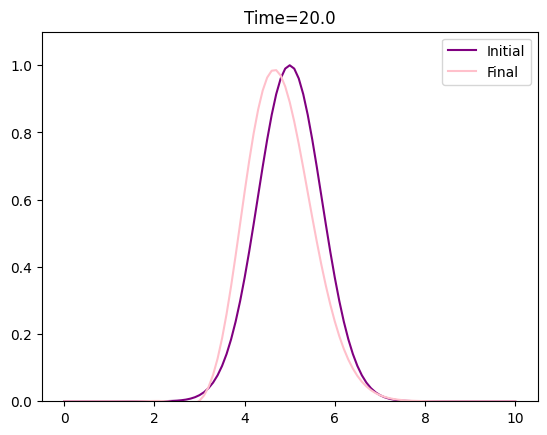

In [22]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial', color='purple')
plt.plot(x, u_current, label='Final', color='pink')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [23]:
# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

['fig_00040.png', 'fig_00370.png', 'fig_00120.png', 'fig_00320.png', 'fig_00210.png', 'fig_00270.png', 'fig_00260.png', 'fig_00180.png', 'fig_00060.png', 'fig_00100.png', 'fig_00020.png', 'fig_00280.png', 'fig_00290.png', 'fig_00090.png', 'fig_00240.png', 'fig_00002.png', 'fig_00400.png', 'fig_00340.png', 'fig_00250.png', 'fig_00140.png', 'fig_00390.png', 'fig_00200.png', 'fig_00380.png', 'fig_00190.png', 'fig_00300.png', 'fig_00010.png', 'fig_00130.png', 'fig_00070.png', 'fig_00220.png', 'fig_00080.png', 'fig_00350.png', 'fig_00230.png', 'fig_00150.png', 'fig_00310.png', 'fig_00330.png', 'fig_00050.png', 'fig_00160.png', 'fig_00000.png', 'fig_00360.png', 'fig_00110.png', 'fig_00170.png', 'fig_00030.png'] 

['fig_00000.png', 'fig_00002.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150

In [236]:
import imageio
with imageio.get_writer(f'./images/movie_leapfrog.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(f'{directory}/'+file)
        writer.append_data(image)
        
files=[]


/tmp/ipykernel_122371/1532268151.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{directory}/'+file)


In [237]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images/movie_leapfrog.mp4" type="video/mp4">
</video></div>""")

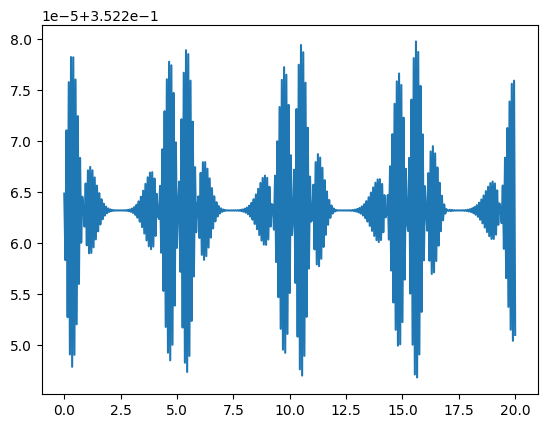

In [238]:
plt.plot(time,l2norm)
plt.show()

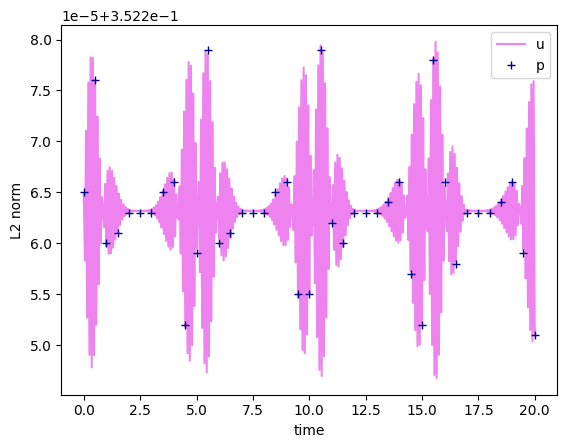

In [24]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')
plt.plot(time,l2norm, color='violet', label='my derivation')
plt.plot(l2_saved[:,0], l2_saved[:,1], '+', color='darkblue', label='stored data')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.legend('upper left')
plt.show()

#### Change par

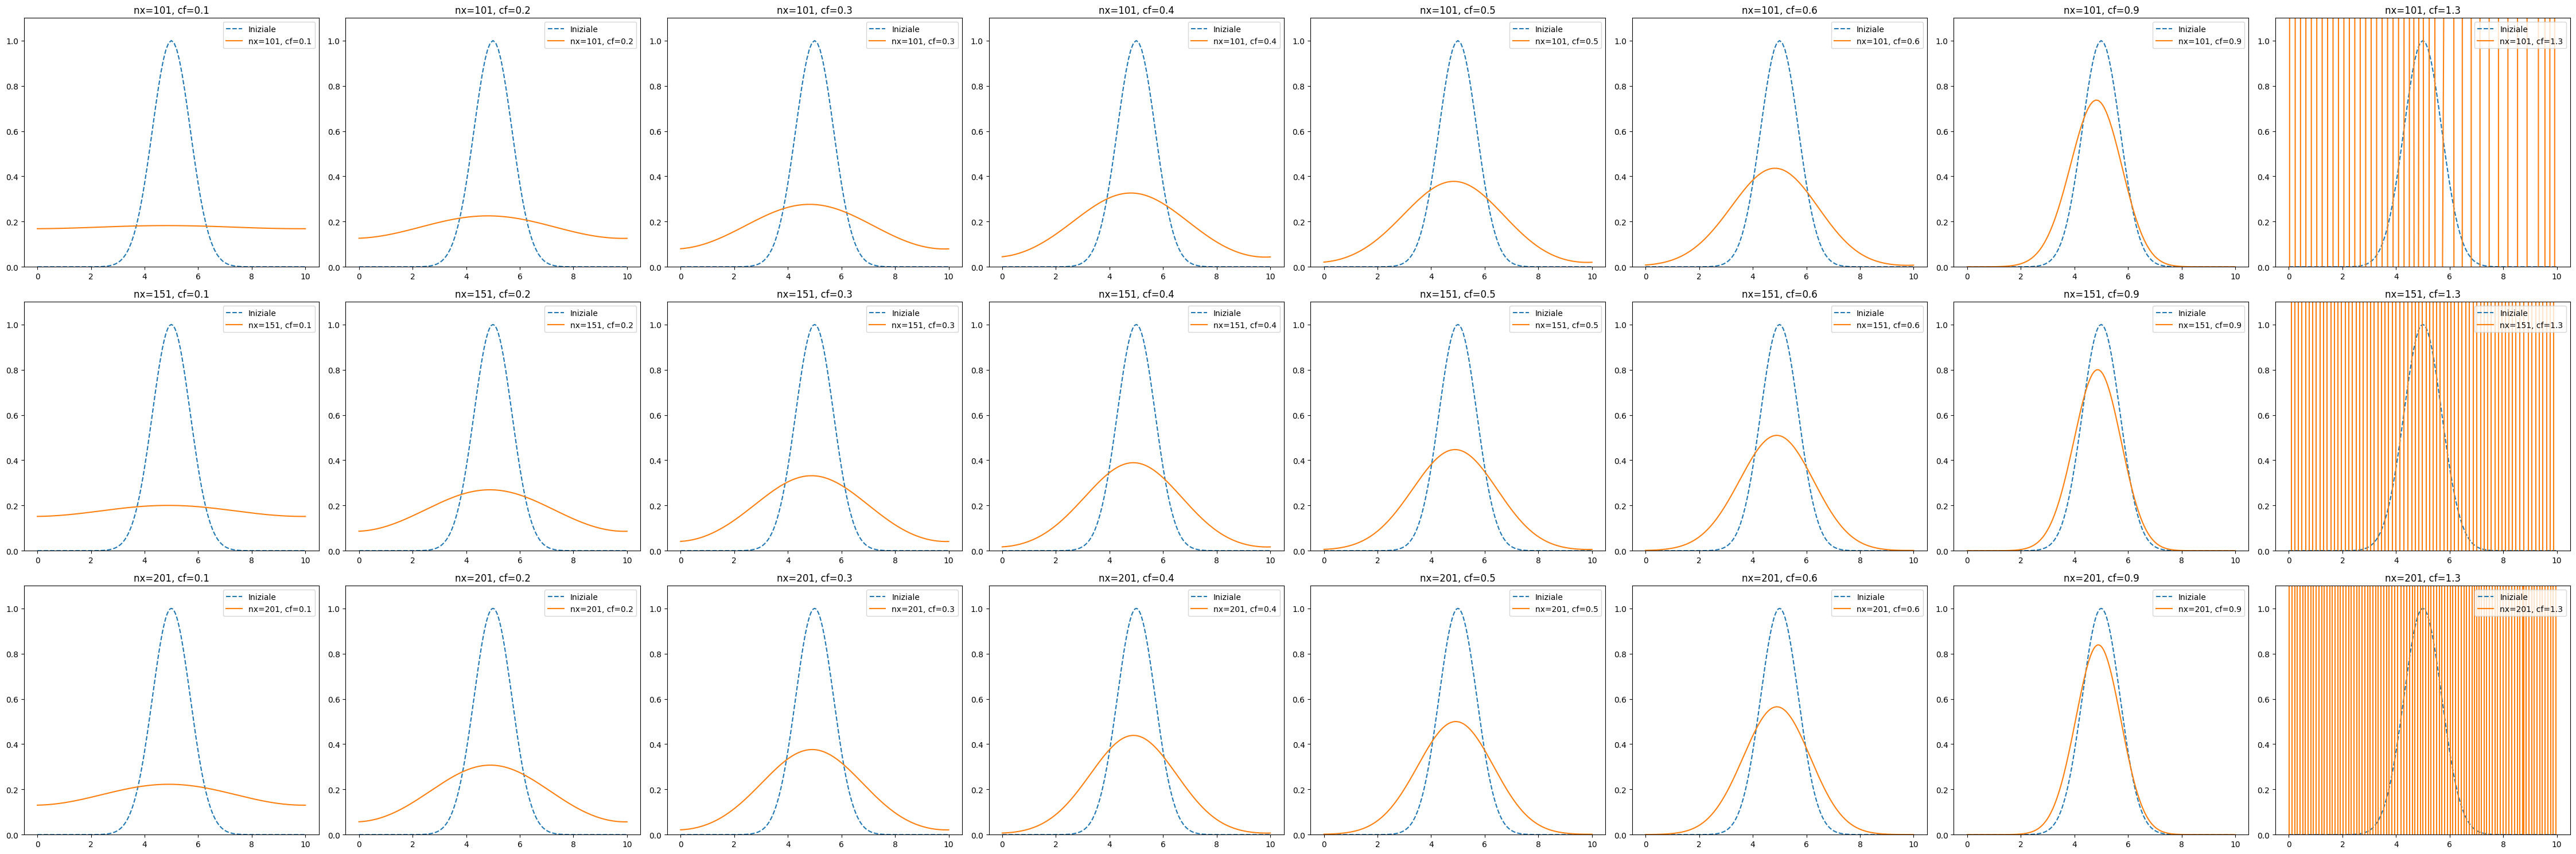

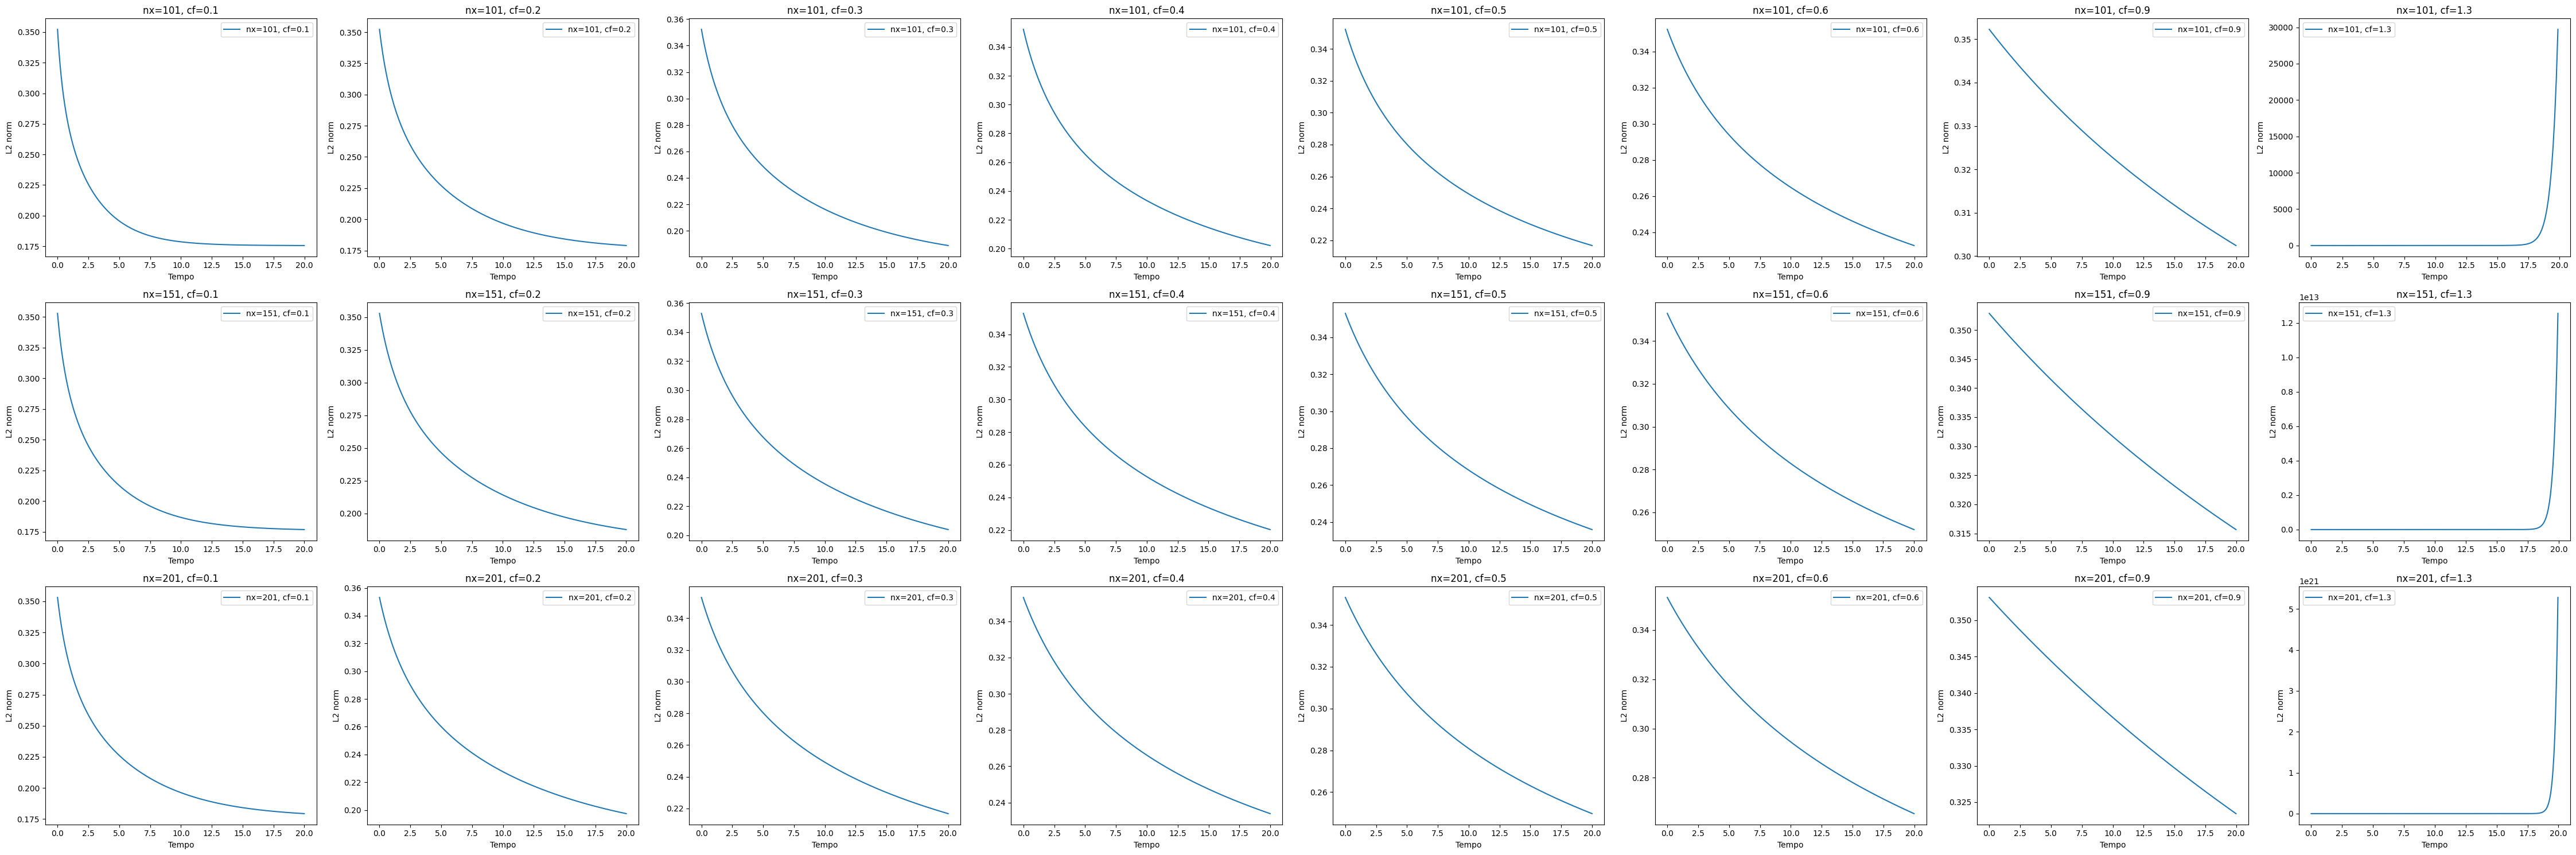

In [229]:
def solve_advection_leapfrog(nx, cf, t_final=20.0, a=1.0):
    L = 10.0
    dx = L / (nx - 1)
    x = np.linspace(0, L, nx)
    dt = cf * dx / a
    num_iter = int(t_final / dt)
    x0 = 5
    u_initial = np.exp(-(x-x0)**2)
    u_prec = np.exp(-((x + a * dt) - x0) ** 2)
    u_current = u_initial.copy()
    u_previous = u_prec.copy()
    l2norm = [np.sqrt(np.sum(u_current ** 2) / len(u_current))]
    time = [0.0]
    t = 0.0
    
    for i in range(num_iter):
        u_next = u_previous - (a * dt / dx) * (np.roll(u_current, -1) - np.roll(u_current, 1))
        u_previous = u_current.copy()
        u_current = u_next.copy()
        t += dt
        l2norm.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))
        time.append(t)
    
    return x, u_initial, u_current, time, l2norm

nx_values = [101, 151, 201]
cf_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1.3]
plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        x, u_initial, u_final, time, l2norm = solve_advection_laxfried(nx, cf)
        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(x, u_initial, '--', label="Iniziale")
        plt.plot(x, u_final, label=f"nx={nx}, cf={cf}")
        plt.ylim(0, 1.1)
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        _, _, _, time, l2norm = solve_advection_leapfrog(nx, cf)
        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(time, l2norm, label=f"nx={nx}, cf={cf}")
        plt.xlabel("Tempo")
        plt.ylabel("L2 norm")
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()


### LAX-WENDROFF

In [27]:
directory = './images/laxwendroff'

if not os.path.exists(directory):
    os.makedirs(directory)
# speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)


# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5

u_current = u_initial.copy()  

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [28]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the lax-wendroff method
    u_next = u_current - (a * dt / dx)/2 * (np.roll(u_current, -1) - np.roll(u_current, 1)) + ((a * dt / dx)** 2)/2 * (np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1)) 

    u_current = u_next.copy()
  
    t += dt
    i += 1
    
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
 
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


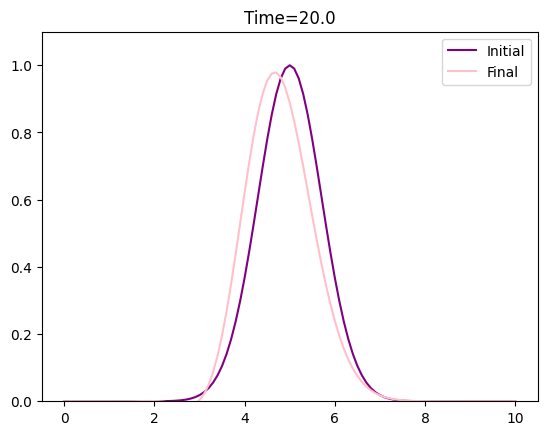

In [29]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial', color='purple')
plt.plot(x, u_current, label='Final', color='pink')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [30]:
# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00040.png', 'fig_00370.png', 'fig_00120.png', 'fig_00320.png', 'fig_00210.png', 'fig_00270.png', 'fig_00260.png', 'fig_00180.png', 'fig_00060.png', 'fig_00100.png', 'fig_00020.png', 'fig_00280.png', 'fig_00290.png', 'fig_00090.png', 'fig_00240.png', 'fig_00400.png', 'fig_00340.png', 'fig_00250.png', 'fig_00140.png', 'fig_00390.png', 'fig_00200.png', 'fig_00380.png', 'fig_00190.png', 'fig_00300.png', 'fig_00010.png', 'fig_00130.png', 'fig_00070.png', 'fig_00220.png', 'fig_00080.png', 'fig_00350.png', 'fig_00230.png', 'fig_00150.png', 'fig_00310.png', 'fig_00330.png', 'fig_00050.png', 'fig_00160.png', 'fig_00000.png', 'fig_00360.png', 'fig_00110.png', 'fig_00170.png', 'fig_00030.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170

In [31]:
import imageio
with imageio.get_writer(f'./images/movie_laxwendroff.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(f'{directory}/'+file)
        writer.append_data(image)
        
files=[]


/tmp/ipykernel_1627/2436248716.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{directory}/'+file)


In [151]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images/movie_laxwendroff.mp4" type="video/mp4">
</video></div>""")

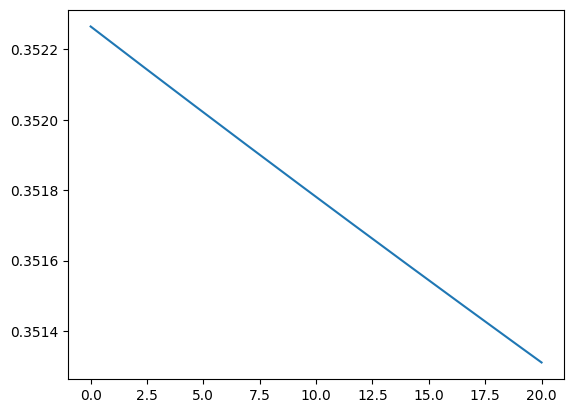

In [32]:
plt.plot(time,l2norm)
plt.show()

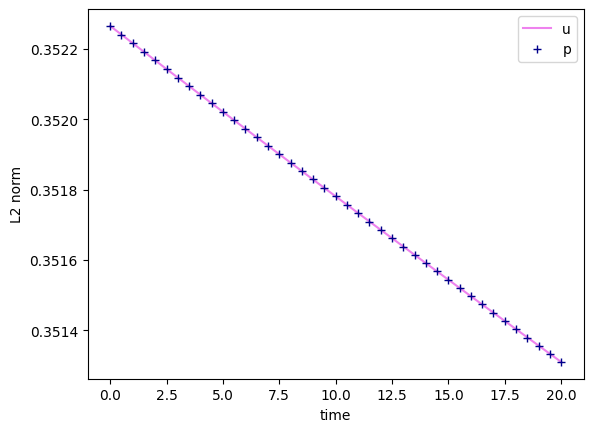

In [33]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAXWENDROFF.dat', comments='#')
plt.plot(time,l2norm, color='violet', label='my derivation')
plt.plot(l2_saved[:,0], l2_saved[:,1], '+', color='darkblue', label='stored data')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.legend('upper left')
plt.show()

#### Change par

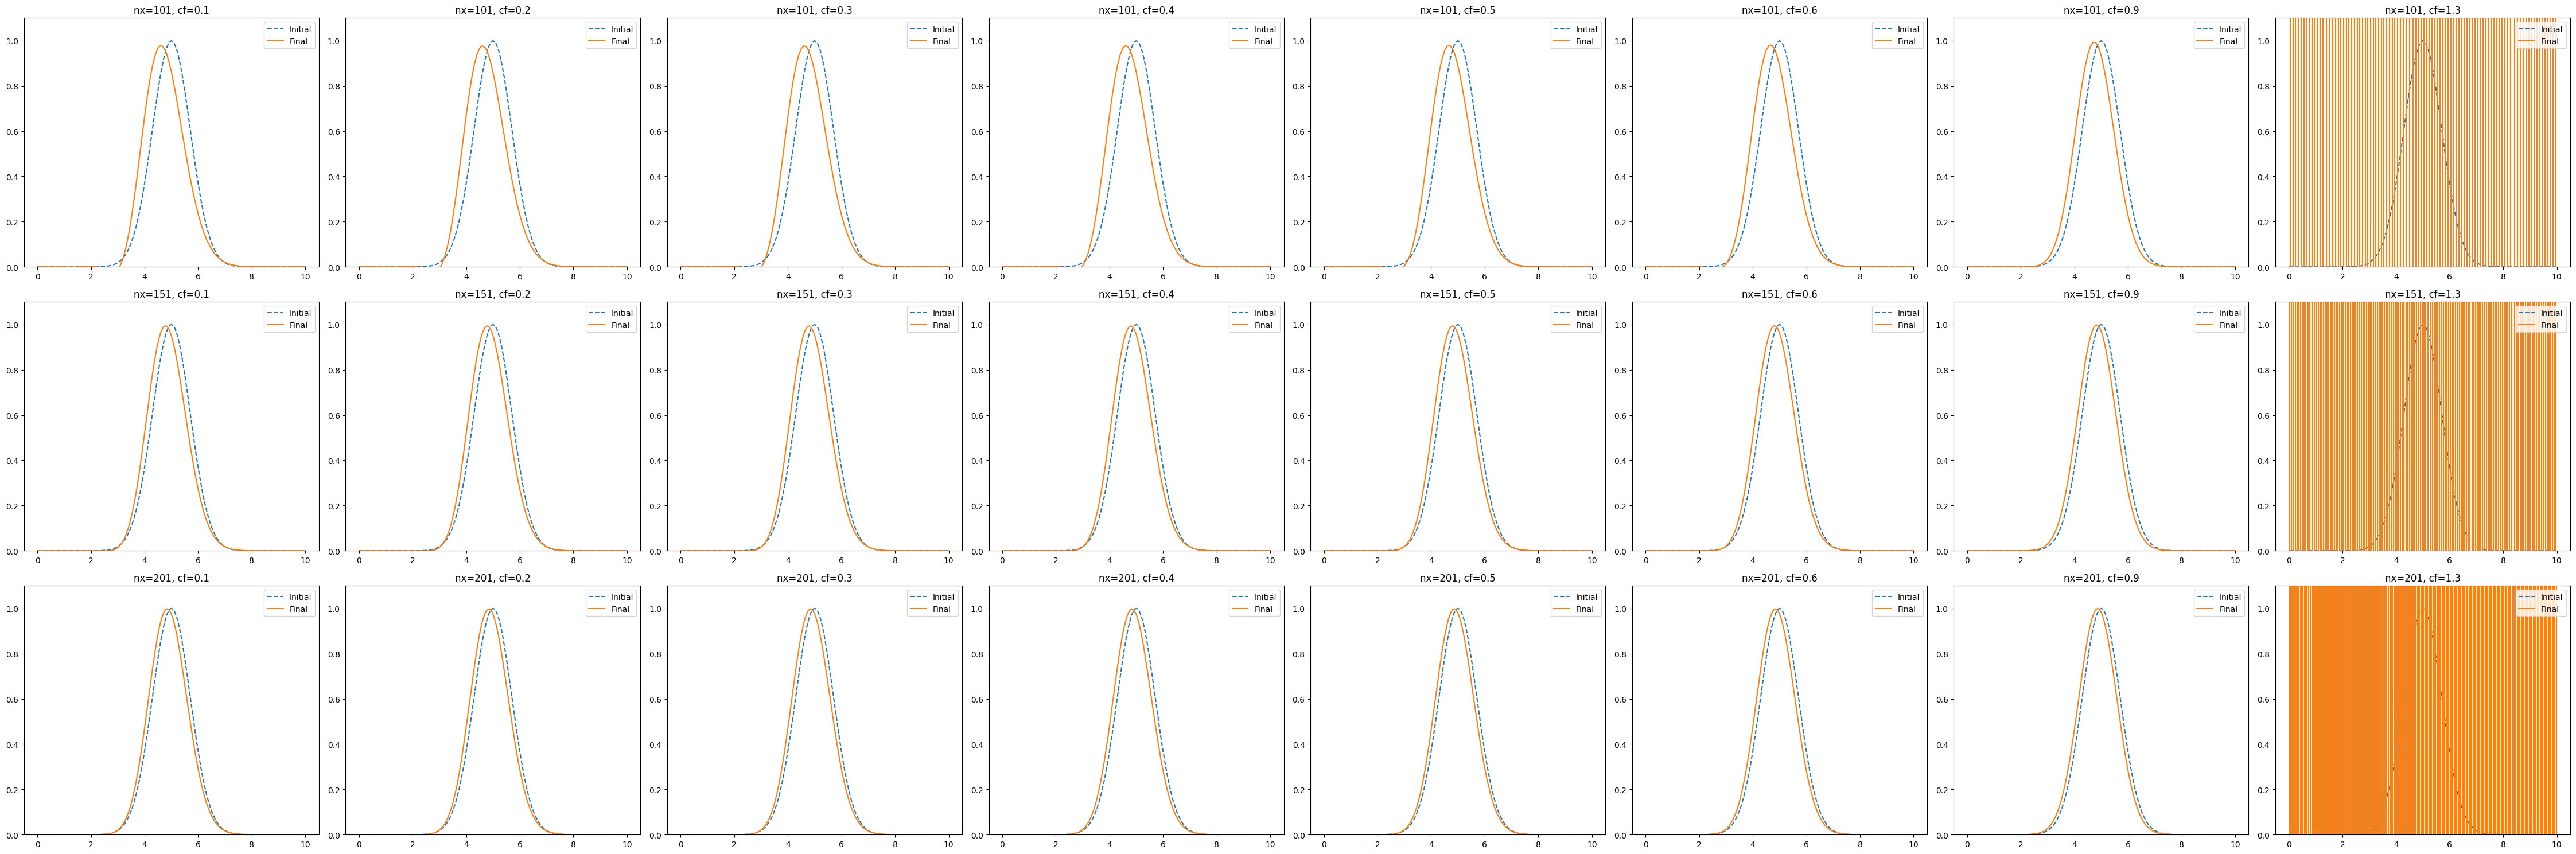

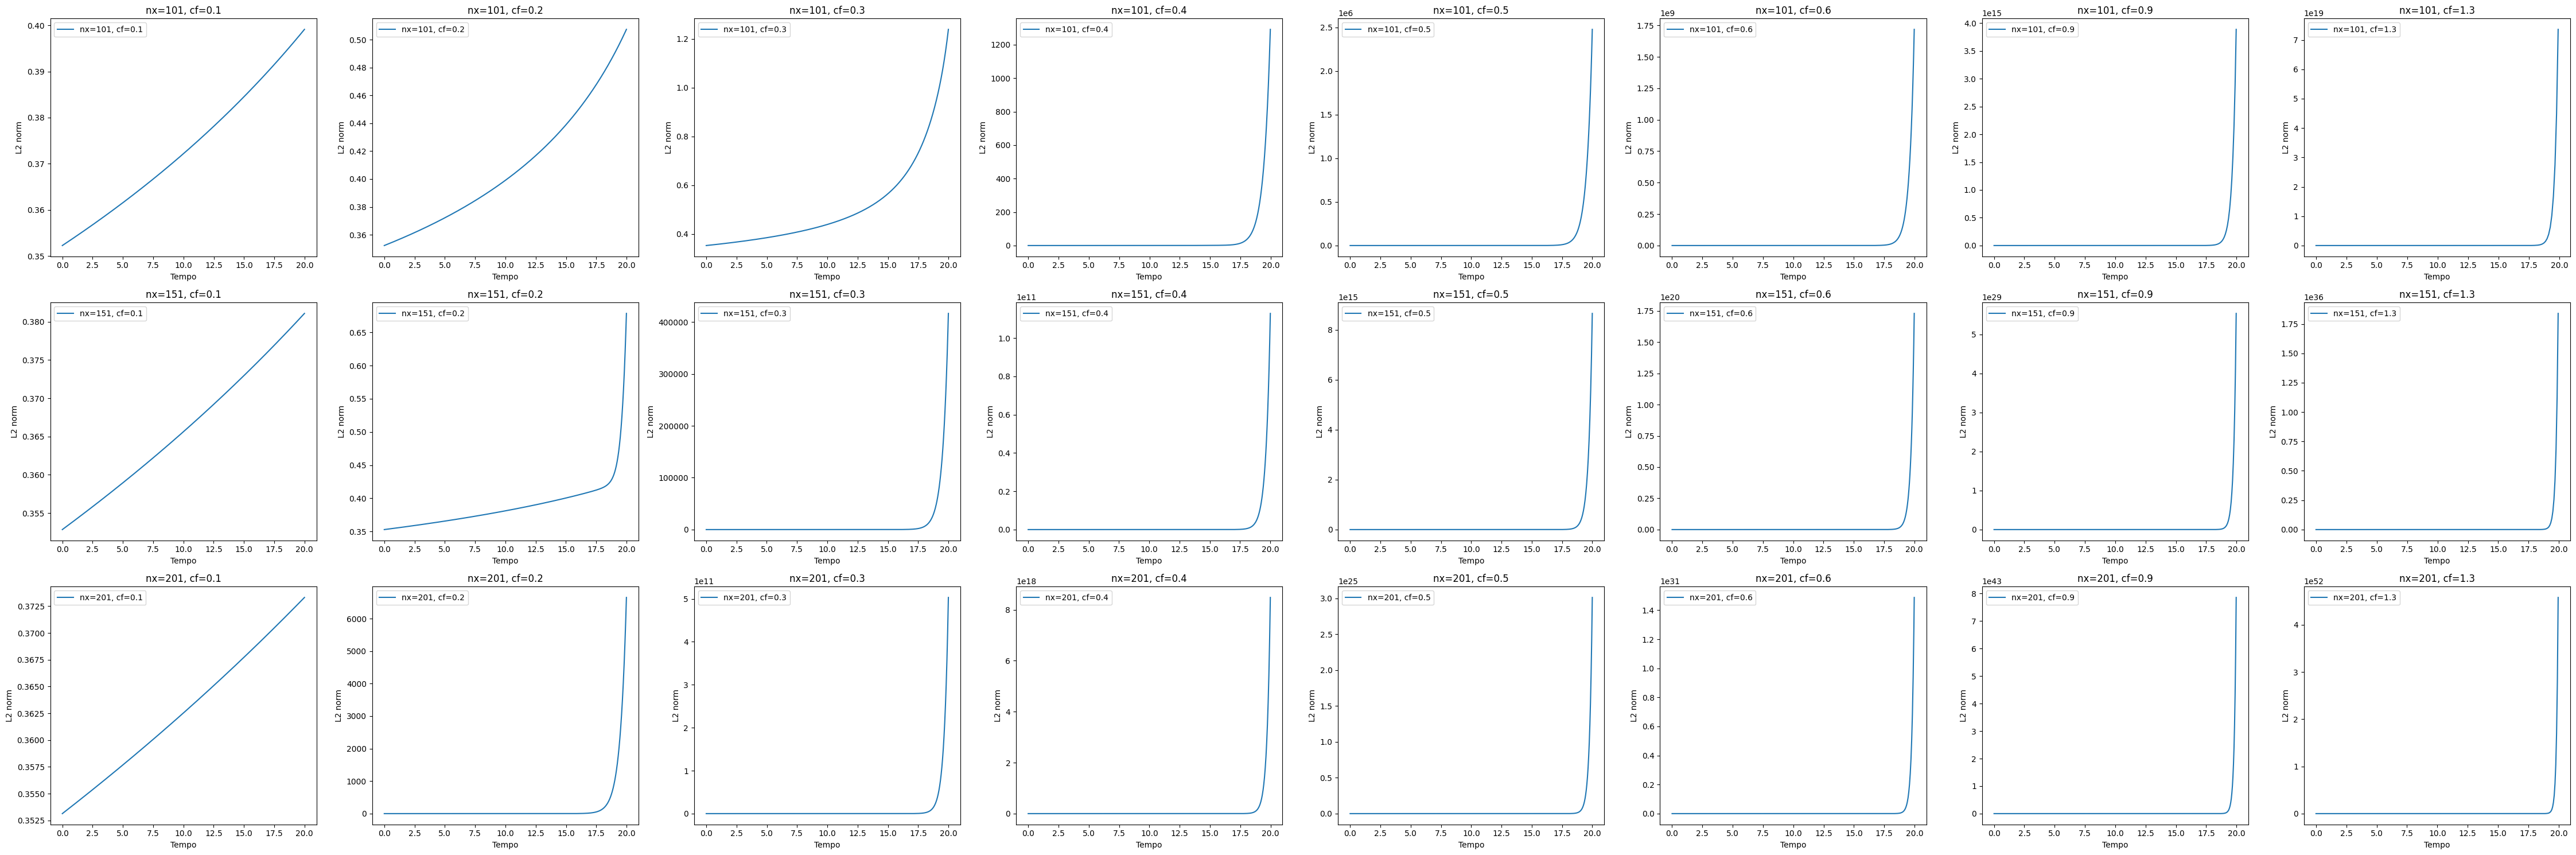

In [34]:
def solve_advection_laxwend(nx, cf, t_final=20.0, a=1.0):
    L = 10.0
    dx = L / (nx - 1)
    x = np.linspace(0, L, nx)
    dt = cf * dx / a
    num_iter = int(t_final / dt)
    x0 = 5
    u_initial = np.exp(-(x - x0) ** 2)
    u_current = u_initial.copy()
    l2norm = [np.sqrt(np.sum(u_current ** 2) / len(u_current))]
    time = [0.0]
    t = 0.0
    
    for i in range(num_iter):
        u_next = u_current - (a * dt / dx)/2 * (np.roll(u_current, -1) - np.roll(u_current, 1)) + ((a * dt / dx)** 2)/2 * (np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))
        u_current = u_next.copy()
        t += dt
        l2norm.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))
        time.append(t)
    
    return x, u_initial, u_current, time, l2norm

nx_values = [101, 151, 201]
cf_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1.3]

plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        x, u_initial, u_final, time, l2norm = solve_advection_laxwend(nx, cf)
        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(x, u_initial, '--', label="Initial")
        plt.plot(x, u_final, label=f"Final")
        plt.ylim(0, 1.1)
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(45, 15))

for i, nx in enumerate(nx_values):
    for j, cf in enumerate(cf_values):
        _, _, _, time, l2norm = solve_advection_ftcs(nx, cf)
        plt.subplot(len(nx_values), len(cf_values), i * len(cf_values) + j + 1)
        plt.plot(time, l2norm, label=f"nx={nx}, cf={cf}")
        plt.xlabel("Tempo")
        plt.ylabel("L2 norm")
        plt.legend()
        plt.title(f"nx={nx}, cf={cf}")

plt.tight_layout()
plt.show()


## OPTIONAL (da fare)